In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [4]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
match.shape

(756, 18)

In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### The data is scattered and we need specific columns for our analysis, therefore implementing Feature Engineering. 

### Also, avoiding to treat/remove the null values as they carry other significant information

In [54]:
# creating a new dataframe for the model which would group as per the match ID 
# and tell in which inning how many runs were scored
df_total_score = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [55]:
# selecting the first inning as we need the chasing score
df_total_score = df_total_score[df_total_score['inning'] == 1]

In [56]:
df_total_score

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [57]:
# merging the above created dataframe with Match dataframe and adding new column "Total Runs" which
# consists of total runs of the 1st innings of that particular matchID
df_match = match.merge(df_total_score[['match_id','total_runs']],left_on='id',right_on='match_id')

In [58]:
df_match

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


### Observing that a lot of teams which used to play may have changed their names of they may have left the league, therefore considering only the teams which are playing currently.

In [59]:
# Finding uniques teams in the match dataframe 
df_match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [60]:
# Identifying the current teams which are playing in the league and storing this data in a list
curr_teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [61]:
# Identifying teams who have changed their names and replacing their old names with new ones

df_match['team1'] = df_match['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df_match['team2'] = df_match['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

df_match['team1'] = df_match['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df_match['team2'] = df_match['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [62]:
# using the list above to make sure and keep the teams which are currently involved
df_match = df_match[df_match['team1'].isin(curr_teams)]
df_match = df_match[df_match['team2'].isin(curr_teams)]

In [63]:
df_match.shape

(641, 20)

In [64]:
# eliminating the data which have been affected by rain, therefore filtering on "dl_applied"
df_match = df_match[df_match['dl_applied'] == 0]

### Now picking out the important columns from df_match and merging with Delivery dataframe

In [65]:
df_match = df_match[['match_id','city','winner','total_runs']]

In [66]:
df_delivery = df_match.merge(delivery,on='match_id')

In [67]:
# extracting the second innings because we need the values when the team is chasing the score
df_delivery = df_delivery[df_delivery['inning'] == 2]

### Implementing Feature Engineering: creating columns from existing columns using logics
#### creating : Current Score, Runs Left, Balls Left and Current Runrate and Required Runrate

In [68]:
# the column "total_runs_y" tells how many total runs a team has made after every ball
df_delivery['current_score'] = df_delivery.groupby('match_id')['total_runs_y'].cumsum()


In [69]:
# Now to get the score remaining, we will subtract the "current score" target score "total_runs_x" 
df_delivery['runs_left'] = df_delivery['total_runs_x'] - df_delivery['current_score']

In [70]:
# Now calculating the balls remaming to hit the taregt score
df_delivery['balls_left'] = 126 - (df_delivery['over']*6 + df_delivery['ball'])

In [71]:
df_delivery

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [72]:
# section to find out how many wickets are reminaing after each ball
# filling the NAN values with 0 and then using this to find the wickets
df_delivery['player_dismissed'] = df_delivery['player_dismissed'].fillna("0")
df_delivery['player_dismissed'] = df_delivery['player_dismissed'].apply(lambda x:x if x == "0" else "1")
df_delivery['player_dismissed'] = df_delivery['player_dismissed'].astype('int')
wickets = df_delivery.groupby('match_id')['player_dismissed'].cumsum().values
#wickets = df_delivery.groupby('match_id').cumsum()['player_dismissed'].values
df_delivery['wickets_left'] = 10 - wickets


In [73]:
df_delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [74]:
# calculating current run rate
# crr = runs/overs
df_delivery['current_run_rate'] = (df_delivery['current_score']*6)/(120 - df_delivery['balls_left'])

In [75]:
# calculating required run rate
df_delivery['req_run_rate'] = (df_delivery['runs_left']*6)/df_delivery['balls_left']

In [76]:
# defining a function to find the result of the match.
# if the winning team and batting team have same names, then the result is 1 else 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [77]:
df_delivery['result'] = df_delivery.apply(result,axis=1)

In [78]:
# formulating the final dataframe and picking the required columns
final_df = df_delivery[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','current_run_rate','req_run_rate','result']]

In [79]:
# for shuffling so that the model is not bias
final_df = final_df.sample(final_df.shape[0])

In [80]:
# displying the same of the new dataframe
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,req_run_rate,result
59194,Delhi Daredevils,Royal Challengers Bangalore,Bangalore,87,55,7,157,6.461538,9.490909,0


In [81]:
final_df.dropna(inplace=True)

In [82]:
# implementing this so that there are no infinite values in the "required runrate column"
final_df = final_df[final_df['balls_left'] != 0]

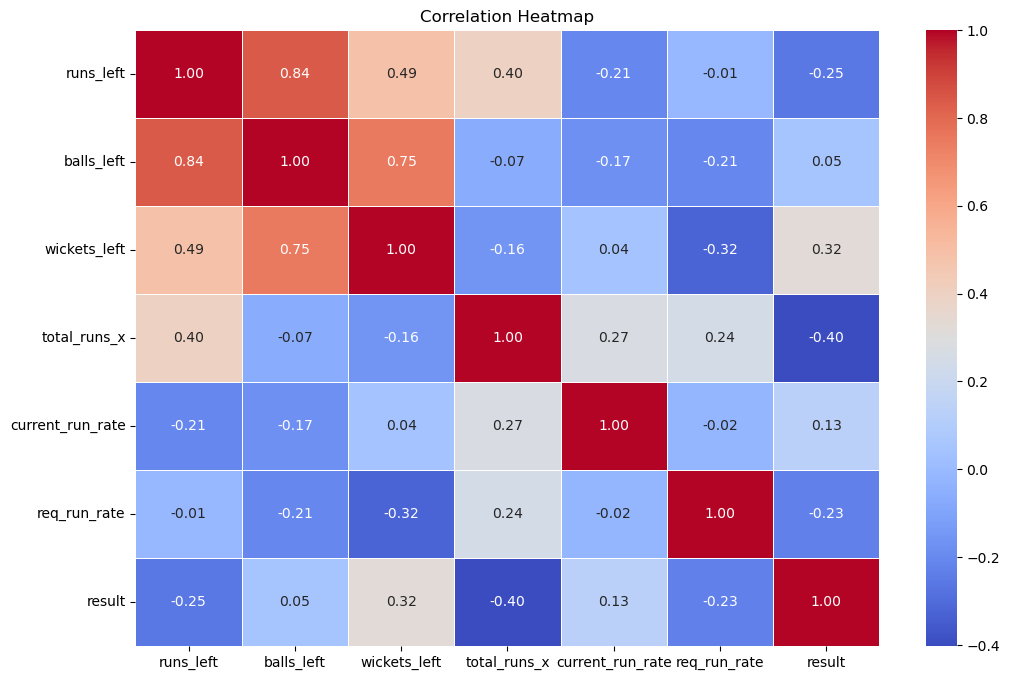

In [83]:
# seeing the correlations between columns
import seaborn as sns
import matplotlib.pyplot as plt

data = final_df[['runs_left','balls_left','wickets_left','total_runs_x','current_run_rate','req_run_rate','result']]

# Calculate the correlation matrix
corr_matrix = data.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Splitting the data and now implementing the model

In [84]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]


In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [86]:
X_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,current_run_rate,req_run_rate
95123,Chennai Super Kings,Rajasthan Royals,Ranchi,106,90,8,148,8.400000,7.066667
121467,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,37,19,5,208,10.158416,11.684211
92492,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,48,32,8,170,8.318182,9.000000
43257,Kings XI Punjab,Mumbai Indians,Chandigarh,61,47,8,154,7.643836,7.787234
103649,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,37,36,8,127,6.428571,6.166667


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [88]:
# using Column transformer to transform all the columns in one go
# using one hot encoding for the categorical values



trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

### Initiating a pipeline for clean input for Logisctic Regression
#### We can use Random Forest but I am not displying it here as it is showing 99.7% accuracy which might lead to overfitting, therefore settling with Logistic Regression.

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [90]:

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [91]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [92]:
y_pred = pipe.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8022286074707408

In [94]:
# finding probability of random match
pipe.predict_proba(X_test)[4]

array([0.73347308, 0.26652692])

### Now, exporting the model for creating a website using streamlit.

In [95]:
curr_teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [96]:
df_delivery['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [97]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))